# My 2021 Medium recap

# Setup

In [1]:
%config InlineBackend.figure_format = "retina"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="tab10", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

## Data

In [3]:
df = pd.read_csv("../data/medium-enhanced-stats-eryk-lewinson.csv", sep=";")
df.head()

,postId,title,slug,firstPublishedAt,readingTime,views,reads,upvotes,claps
0,8c4342b784e8,A Step-by-Step Guide to Calculating Autocorrel...,a-step-by-step-guide-to-calculating-autocorrel...,1643559973605,8,1048,153,22,148
1,f6ea4435ed3c,A Simple Way to Turn Your Plots into GIFs in P...,a-simple-way-to-turn-your-plots-into-gifs-in-p...,1642868514360,5,7968,1346,59,380
2,58333176af4f,The Easiest Way to Identify Holidays in Python,the-easiest-way-to-identify-holidays-in-python,1642284331917,5,6424,667,16,129
3,ef87dcfe5d74,8 More Useful Pandas Functionalities For Your ...,8-more-useful-pandas-functionalities-for-your-...,1642167135464,7,5588,776,30,179
4,db4f1ea87e09,Top 4 Python libraries for technical analysis,top-4-python-libraries-for-technical-analysis,1636099413035,5,9185,1983,63,242


In [4]:

df["report_date"] = pd.to_datetime(df["firstPublishedAt"], unit="ms")
df = (
    df
    .set_index("report_date")
    .loc[:, ["title", "views", "reads", "upvotes", "claps"]]
    .rename(columns={"upvotes": "fans"})
)
df.index = pd.to_datetime(df.index.date)
df["publication_month"] = df.index.month
df["publication_year"] = df.index.year
df["days_since_publication"] = (datetime.now() - df.index).days
df

,title,views,reads,fans,claps,publication_month,publication_year,days_since_publication
2022-01-30,A Step-by-Step Guide to Calculating Autocorrel...,1048,153,22,148,1,2022,48
2022-01-22,A Simple Way to Turn Your Plots into GIFs in P...,7968,1346,59,380,1,2022,56
2022-01-15,The Easiest Way to Identify Holidays in Python,6424,667,16,129,1,2022,63
2022-01-14,8 More Useful Pandas Functionalities For Your ...,5588,776,30,179,1,2022,64
2021-11-05,Top 4 Python libraries for technical analysis,9185,1983,63,242,11,2021,134
...,...,...,...,...,...,...,...,...
2018-11-01,Introduction to quantitative finance: Stylised...,1085,416,26,378,11,2018,1234
2018-08-28,"Make working with large DataFrames easier, at ...",37175,18068,94,491,8,2018,1299
2018-08-04,Long-term asset allocation strategies based on...,4335,1459,29,306,8,2018,1323
2018-07-24,Mario vs. Wario: Image Classification in Python,25551,8537,186,1233,7,2018,1334


In [5]:
df_2021 = df.loc["2021"]

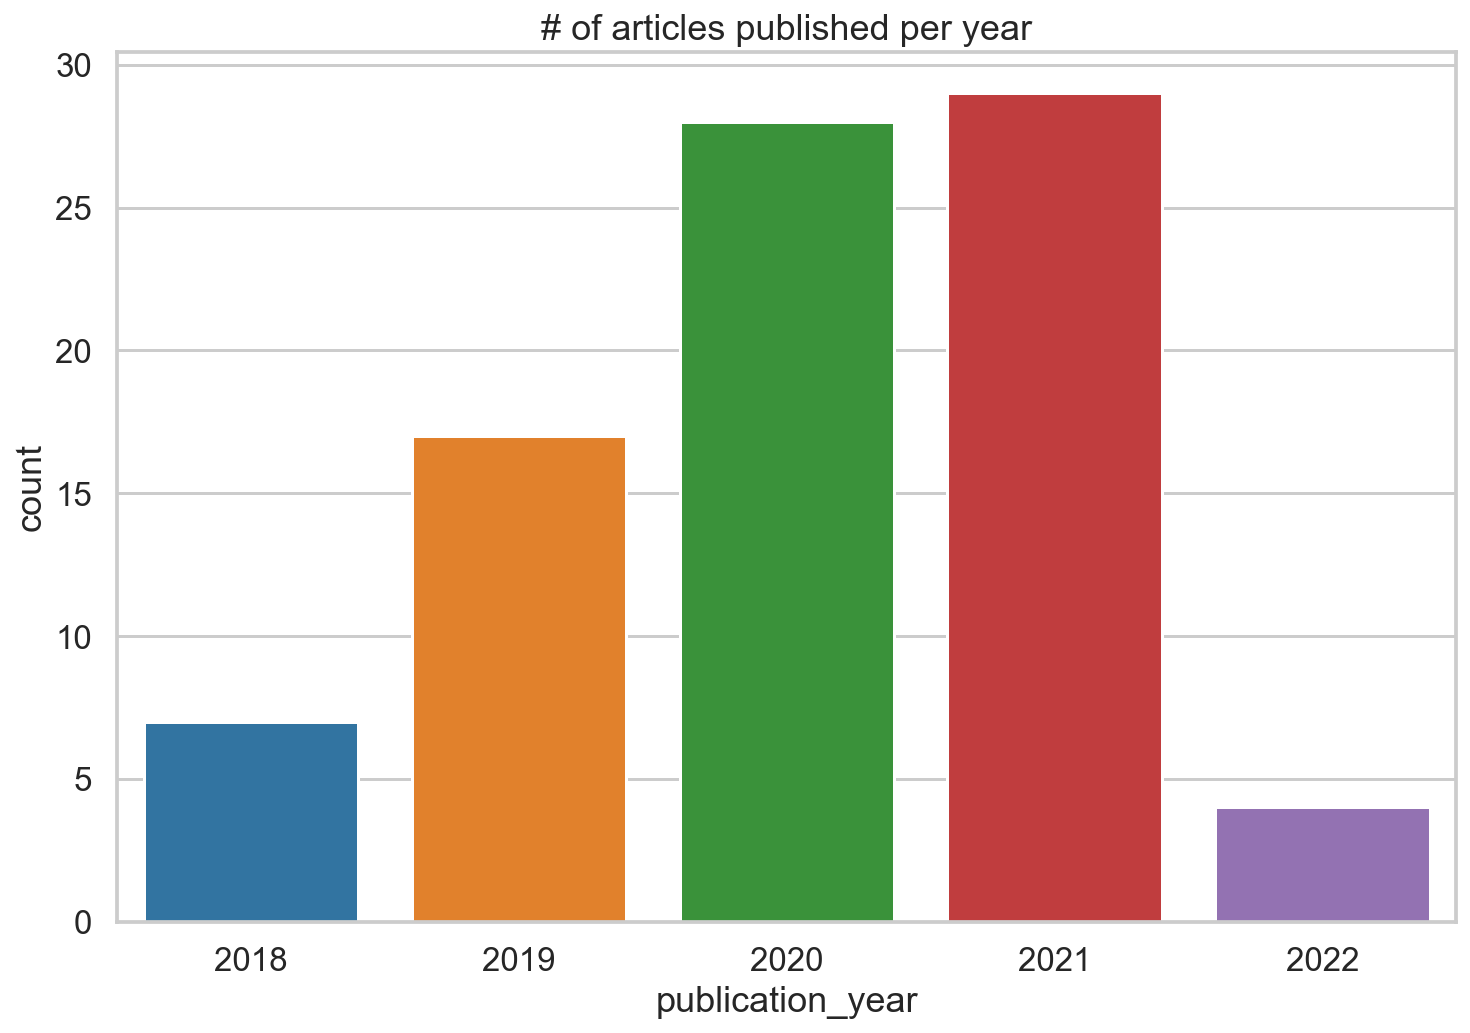

In [6]:
sns.countplot(x="publication_year", data=df, 
              palette="tab10").set_title("# of articles published per year");

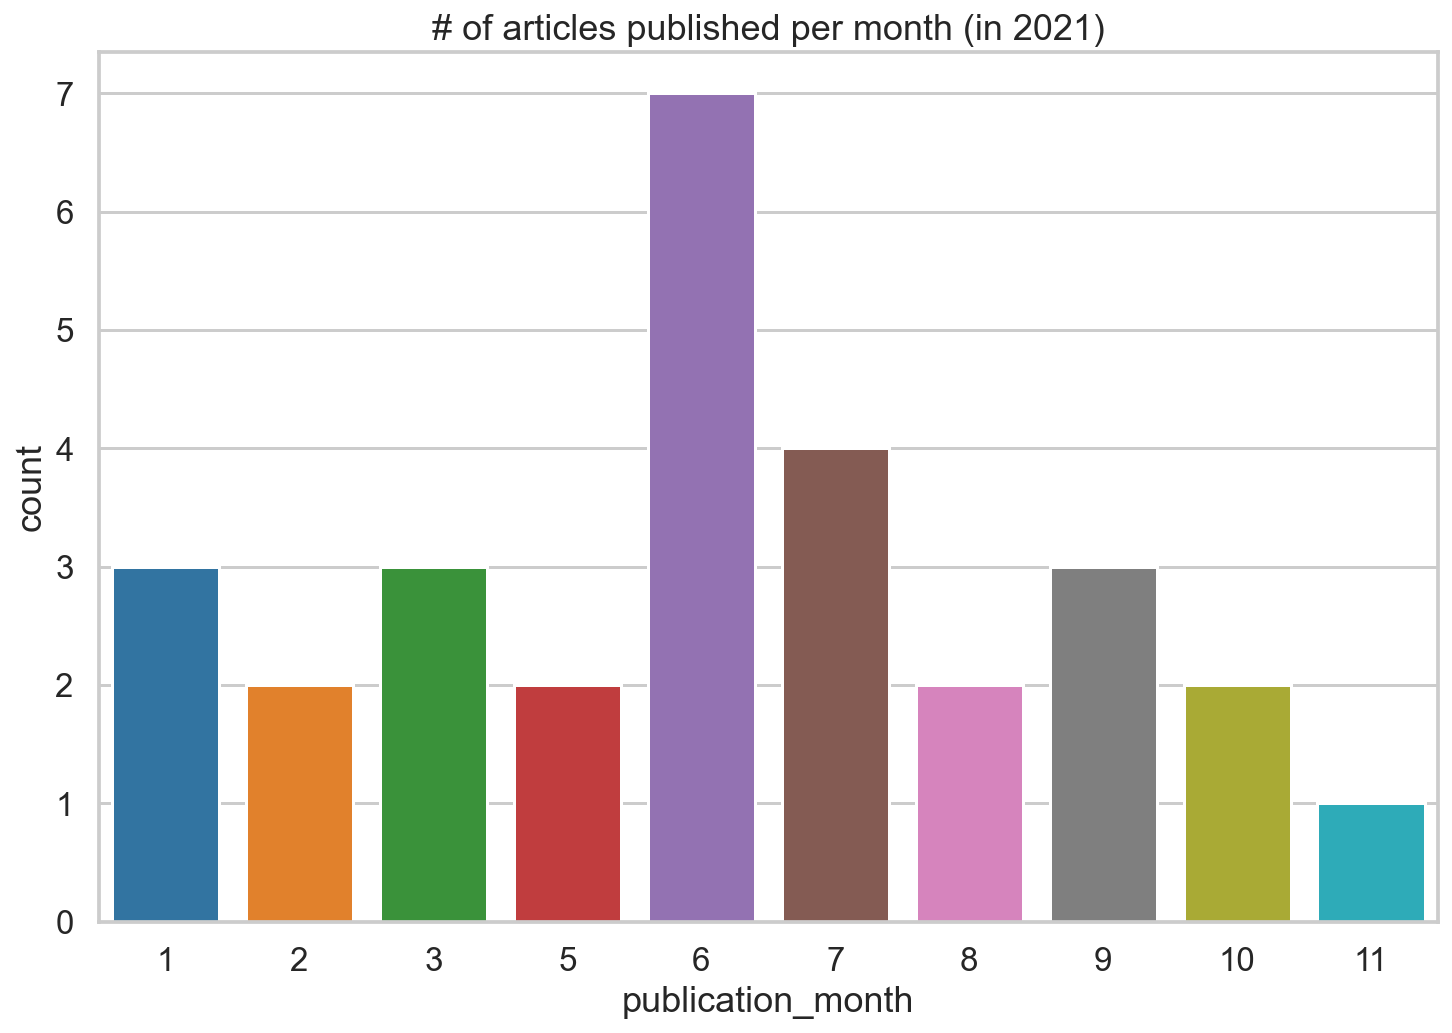

In [7]:
sns.countplot(x="publication_month", data=df_2021, 
              palette="tab10").set_title("# of articles published per month (in 2021)");

In [8]:
df_2021.describe().transpose().astype(int)

,count,mean,std,min,25%,50%,75%,max
views,29,9805,8186,732,3436,7706,14043,36465
reads,29,2110,2094,250,754,1263,2657,9107
fans,29,71,62,14,33,50,93,280
claps,29,280,168,108,179,216,371,846
publication_month,29,5,2,1,3,6,8,11
publication_year,29,2021,0,2021,2021,2021,2021,2021
days_since_publication,29,282,87,134,223,279,370,435


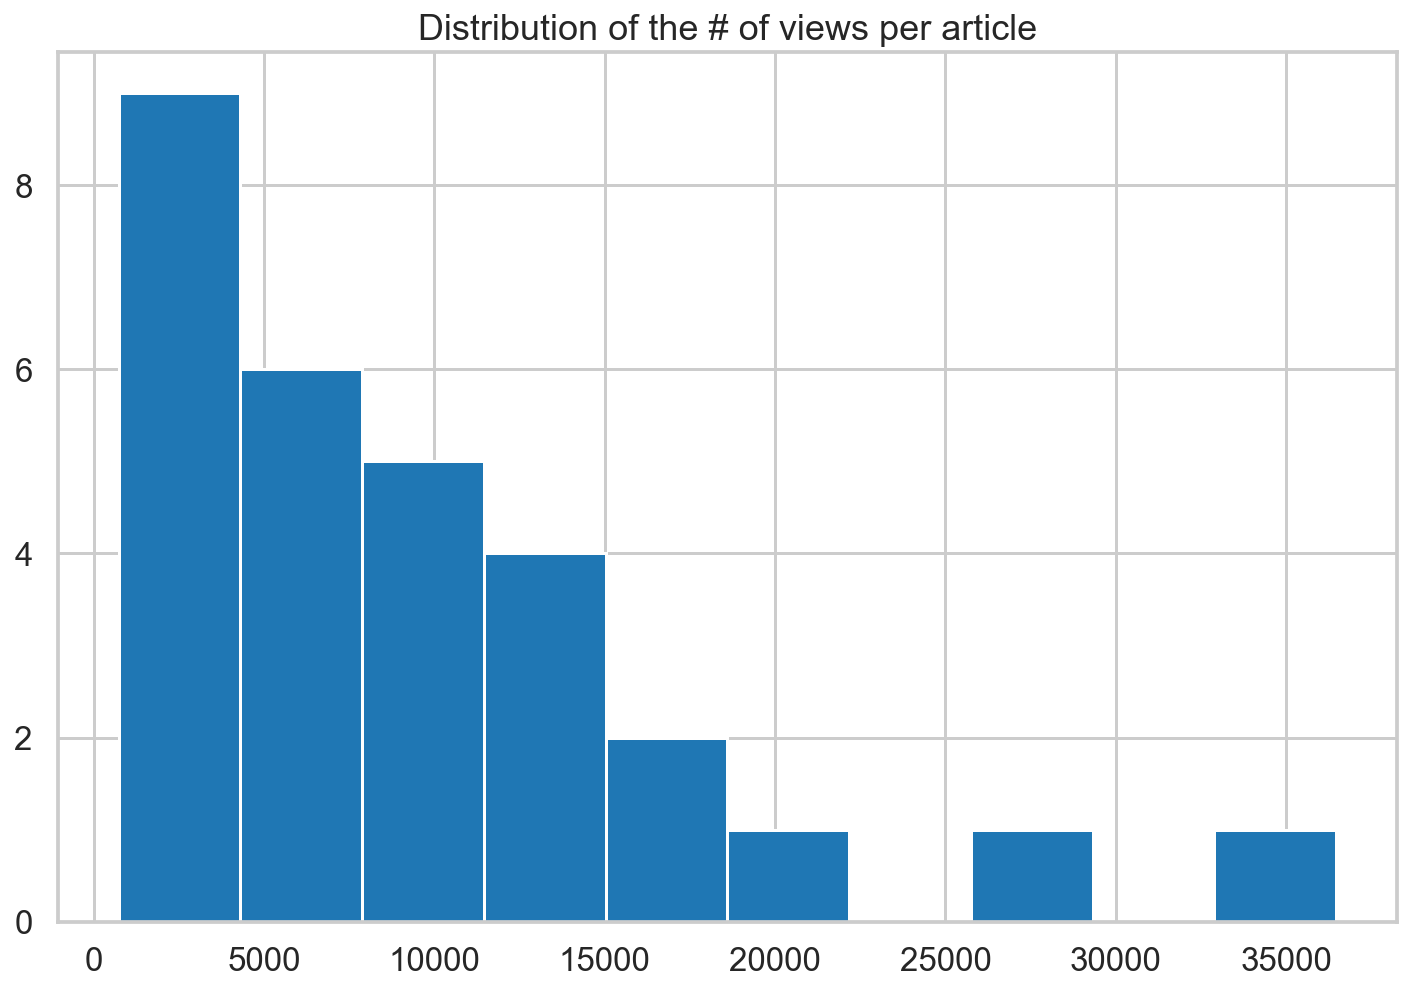

In [9]:
df_2021["views"].hist().set_title("Distribution of the # of views per article");

In [10]:
for col in ["views", "reads", "fans", "claps"]:
    df_2021.loc[:, f"{col}_norm"] = (df_2021.loc[:, col] / df_2021.loc[:, "days_since_publication"]).round(2)
df_2021.head()

<ipython-input-10-d444f55480f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.loc[:, f"{col}_norm"] = (df_2021.loc[:, col] / df_2021.loc[:, "days_since_publication"]).round(2)
<ipython-input-10-d444f55480f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021.loc[:, f"{col}_norm"] = (df_2021.loc[:, col] / df_2021.loc[:, "days_since_publication"]).round(2)
<ipython-input-10-d444f55480f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,title,views,reads,fans,claps,publication_month,publication_year,days_since_publication,views_norm,reads_norm,fans_norm,claps_norm
2021-11-05,Top 4 Python libraries for technical analysis,9185,1983,63,242,11,2021,134,68.54,14.80,0.47,1.81
2021-10-24,One thing you might not have known about linea...,1247,280,19,177,10,2021,146,8.54,1.92,0.13,1.21
2021-10-17,A Simple Way to Download Financial Data from I...,5258,1166,93,408,10,2021,153,34.37,7.62,0.61,2.67
2021-09-18,Artificial Intelligence in Finance: Opportunit...,13356,898,49,181,9,2021,182,73.38,4.93,0.27,0.99
2021-09-12,Use annotations to tell better stories with yo...,1339,432,19,116,9,2021,188,7.12,2.30,0.10,0.62


In [11]:
(
    df_2021
    .drop(columns=["publication_month", "publication_year", "days_since_publication"])
    .describe()
    .transpose()
    .round(2)
)

,count,mean,std,min,25%,50%,75%,max
views,29.0,9805.97,8186.78,732.00,3436.00,7706.00,14043.00,36465.00
reads,29.0,2110.28,2094.56,250.00,754.00,1263.00,2657.00,9107.00
fans,29.0,71.79,62.79,14.00,33.00,50.00,93.00,280.00
claps,29.0,280.69,168.68,108.00,179.00,216.00,371.00,846.00
views_norm,29.0,33.95,25.59,3.14,13.06,29.61,43.26,122.78
reads_norm,29.0,7.06,6.13,1.07,3.02,5.24,8.48,30.66
fans_norm,29.0,0.26,0.21,0.07,0.11,0.17,0.31,1.04
claps_norm,29.0,1.04,0.64,0.37,0.71,0.80,1.21,3.16


In [12]:
(
    df_2021
    .sort_values("views_norm", ascending=False)
    .loc[:, ["title", "views", "views_norm"]]
    .head()
)

,title,views,views_norm
2021-05-26,Quantra — a Python coding platform to learn qu...,36465,122.78
2021-09-18,Artificial Intelligence in Finance: Opportunit...,13356,73.38
2021-11-05,Top 4 Python libraries for technical analysis,9185,68.54
2021-01-08,Lazy Predict: fit and evaluate all the models ...,28796,66.20
2021-06-03,The Simplest Way to Create an Interactive Cand...,14705,50.88


In [13]:
(
    df_2021
    .sort_values("views_norm", ascending=False)
    .loc[:, ["title", "views", "views_norm"]]
    .tail()
)

,title,views,views_norm
2021-07-13,The easiest way to adjust your data for inflat...,2531,10.16
2021-10-24,One thing you might not have known about linea...,1247,8.54
2021-09-12,Use annotations to tell better stories with yo...,1339,7.12
2021-02-06,Improve the train-test split with the hashing ...,2840,7.00
2021-07-29,A simple way to export your Medium’s reading l...,732,3.14


In [14]:
(
    df_2021
    .sort_values("views_norm", ascending=False)
    .loc[:, ["title", "fans", "fans_norm"]]
    .head()
)

,title,fans,fans_norm
2021-05-26,Quantra — a Python coding platform to learn qu...,166,0.56
2021-09-18,Artificial Intelligence in Finance: Opportunit...,49,0.27
2021-11-05,Top 4 Python libraries for technical analysis,63,0.47
2021-01-08,Lazy Predict: fit and evaluate all the models ...,190,0.44
2021-06-03,The Simplest Way to Create an Interactive Cand...,33,0.11


In [15]:
(
    df_2021
    .sort_values("views_norm", ascending=False)
    .loc[:, ["title", "claps", "claps_norm"]]
    .head()
)

,title,claps,claps_norm
2021-05-26,Quantra — a Python coding platform to learn qu...,566,1.91
2021-09-18,Artificial Intelligence in Finance: Opportunit...,181,0.99
2021-11-05,Top 4 Python libraries for technical analysis,242,1.81
2021-01-08,Lazy Predict: fit and evaluate all the models ...,462,1.06
2021-06-03,The Simplest Way to Create an Interactive Cand...,200,0.69
